## EMAIL SPAM DETECTION

#### Importing libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### Loading and understanding the dataset

In [2]:
df=pd.read_csv('spam.csv',encoding='latin1',usecols=['v1','v2'])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.rename(columns={'v1':'Category','v2':'Text'},inplace=True)
df

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Checking for missing values

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Category    0
Text        0
dtype: int64

In [6]:
df.loc[df['Category']=='spam','Category',]=0
df.loc[df['Category']=='ham','Category',]=1


In [7]:
x=df['Text']
y=df['Category']

In [8]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5572, dtype: object

In [9]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

#### Train and test split

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [11]:
vectorizer = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
vectorizer.fit(X_train)
vectorizer.fit(X_test)

Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')


In [12]:
x_train_transformed=vectorizer.transform(X_train.values).toarray()

In [13]:
x_test_transformed=vectorizer.transform(X_test.values).toarray()

In [14]:
x_train_transformed

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
x_test_transformed

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.22267617, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### Model fitting

In [16]:
model=MultinomialNB()
model.fit(x_train_transformed,Y_train)

MultinomialNB()

In [17]:
y_pred=model.predict(x_test_transformed)

In [18]:
accuracy = accuracy_score(Y_test,y_pred)
conf_matrix = confusion_matrix(Y_test,y_pred)
classification_rep = classification_report(Y_test,y_pred)

In [19]:
print('Accuracy:',accuracy)

Accuracy: 0.9847533632286996


In [20]:
print('Confusion Matrix:\n',conf_matrix)

Confusion Matrix:
 [[138  17]
 [  0 960]]


In [21]:
print('Classification Report:',classification_rep)

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.89      0.94       155
           1       0.98      1.00      0.99       960

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.98      0.98      1115



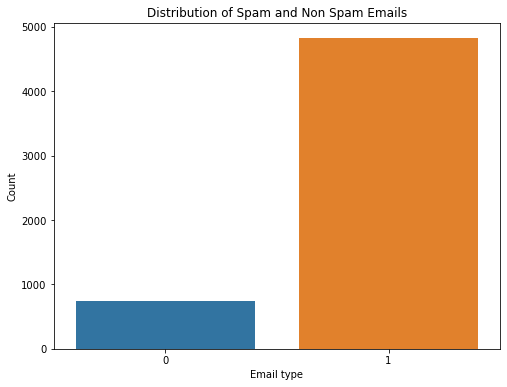

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x="Category",data=df)
plt.title('Distribution of Spam and Non Spam Emails')
plt.xlabel('Email type')
plt.ylabel('Count')
plt.show()

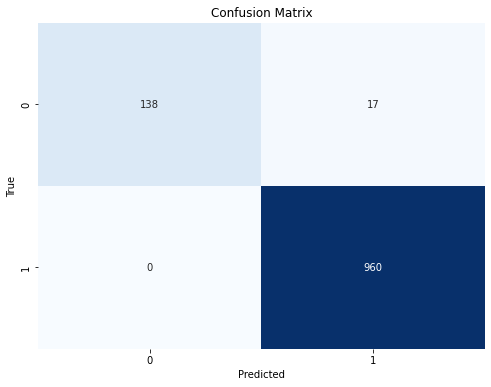

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()